In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette(sns.color_palette("pastel"))

import re

from helpers import get_footer_features

In [2]:
df = pd.read_csv('sample_data.csv')

### Detecting footers

We suppose that footers contain either "copyright" or "(c)" in them, as observed in many samples in the project data set. We want to calculate the number of characters we need to consider in order to be able to extract the majority of footers in the HTML.

In [3]:
lengths = range(500, 3001, 250)
n_footers_copyright = []
n_footers_c = []

for l in lengths:
    footers = df['html'].apply(lambda r: r[-l:] if len(str(r)) > l else r)
    n_footers_copyright.append(sum(footers.apply(lambda r: len(re.findall('copyright ', str(r))) > 0)))
    n_footers_c.append(sum(footers.apply(lambda r: len(re.findall('\(c\)', str(r))) > 0)))

In [4]:
total_n_copyright = sum(df['html'].apply(lambda r: len(re.findall('copyright', str(r))) > 0))
total_n_c = sum(df['html'].apply(lambda r: len(re.findall('\(c\)', str(r))) > 0))
total_n_c_symbol = sum(df['html'].apply(lambda r: len(re.findall('©', str(r))) > 0))
print('Total number of pages containing \'copyright\' in HTML: %d (%d%% of pages)' % (
    total_n_copyright, total_n_copyright / len(df) * 100))
print('Total number of pages containing \'(c)\' in HTML: %d (%d%% of pages)' % (
    total_n_c, total_n_c / len(df) * 100))

Total number of pages containing 'copyright' in HTML: 455 (43% of pages)
Total number of pages containing '(c)' in HTML: 791 (75% of pages)


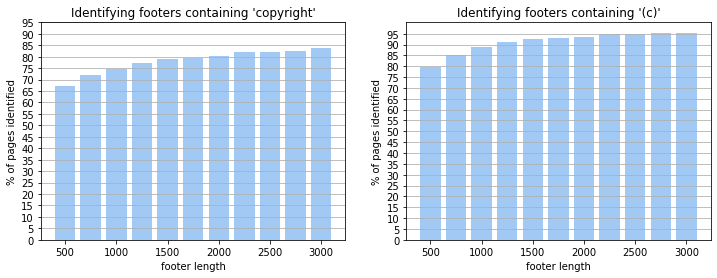

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].bar(lengths, [x * 100 / total_n_copyright for x in n_footers_copyright], width=200)
ax[0].set_xlabel('footer length')
ax[0].set_ylabel('% of pages identified')
ax[0].set_yticks(range(0, 100, 5))
ax[0].grid(True, axis='y')
ax[0].set_title('Identifying footers containing \'copyright\'')

ax[1].bar(lengths, [x * 100 / total_n_c for x in n_footers_c], width=200)
ax[1].set_xlabel('footer length')
ax[1].set_ylabel('% of pages identified')
ax[1].set_yticks(range(0, 100, 5))
ax[1].grid(True, axis='y')
ax[1].set_title('Identifying footers containing \'(c)\'')

plt.show()

We suppose that it is likely that the word 'copyright' appears in pages outside of the footer more commonly than '©' does.

Thus, we assume that the two right plots are more appropriate for being able to identify the approximate upper limit for the length of a footer in terms of characters. We identify over 90% of pages that contain '(c)' already at footer length 1500. At this length we identify almost 80% of pages that contain 'copyright'. Thus, we choose to define an **upper limit for footer length to be 1500 characters**, where approximately 90% of pages containing '(c)' are identified, and 80% of pages containing 'copyright' are identified.

In [6]:
df = get_footer_features(df)

### Example footers:

In [7]:
for s in df.footer[40:43]:
    print(s, '\n------------')

copyright 2018 nasoneb, inc. | all rights reserved  
the nasoneb nasal nebulizer is a registered trademark  
pulmicort respules is a trademark of astrazeneca  
the nasoneb system is protected under us patent 8,146,587, 8,162,921,
8,925,544, 9,402,947, 9,440,020 & other patents pending.  
home | why nasoneb works | using nasoneb | where to purchase | resources | in
the news | testimonials  
about nasoneb, inc. | policies | terms of use | contact us  
  

www.nasoneb.com website design by lonzo designs  
#nasoneb #nasonebnasalnebulizer #chronicsinusitis #sinusitus #rhinitis
#nasalirrigation #nasalnebulizer #nasonebsystem  
#sinusinfection #allergicfungalrhinosinusitis #nasalpolyps #lymedisease
#rhinosinusitis #allergicrhinitis #nasalallergies



  
 
------------
copyright (c) 2009  2015 datastick systems, inc. patents pending, patent
awarded 7,580,695. datastick is a registered trademark, and vsa, datastick
reporting system, drs, directzoom, impact factor, datastick inspect, inspect
rou

We observe examples of extracted footers. These seem quite plausible.

In [8]:
df['footer_len'] = df.footer.apply(len)

In [9]:
cat_count_d = dict(df.groupby('cat').footer.count())
df.loc[:, 'cat_count'] = df.cat.apply(lambda r: cat_count_d[r])

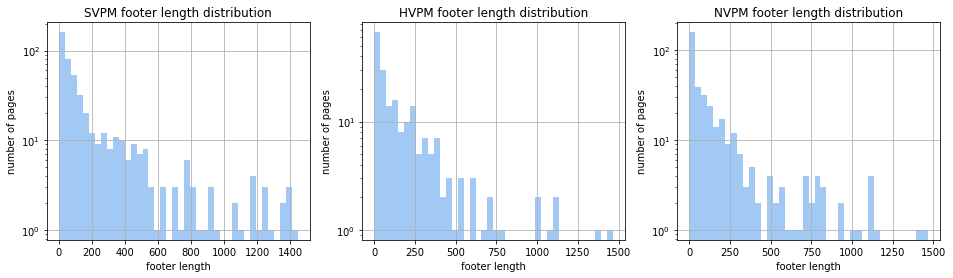

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

df.loc[df['cat'] == 'svpm', 'footer_len'].hist(bins=40, ax=ax[0], log=True)
ax[0].set_xlabel('footer length')
ax[0].set_ylabel('number of pages')
ax[0].set_title('SVPM footer length distribution')

df.loc[df['cat'] == 'hvpm', 'footer_len'].hist(bins=40, ax=ax[1], log=True)
ax[1].set_xlabel('footer length')
ax[1].set_ylabel('number of pages')
ax[1].set_title('HVPM footer length distribution')

df.loc[df['cat'] == 'nvpm', 'footer_len'].hist(bins=40, ax=ax[2], log=True)
ax[2].set_xlabel('footer length')
ax[2].set_ylabel('number of pages')
ax[2].set_title('NVPM footer length distribution')

plt.show()

In [11]:
df.loc[df['footer_len'] == 0].groupby('cat').footer.count() / df.groupby('cat').footer.count()

cat
hvpm    0.285024
nvpm    0.393855
svpm    0.278008
Name: footer, dtype: float64

No significant difference: around 30%-40% of all pages have no identifiable footers, consistently across categories.

### When does footer start?

In [12]:
df['footer_percentage'] = df.apply(lambda r: (len(r.html) - len(r.footer)) / len(r.html), axis=1)

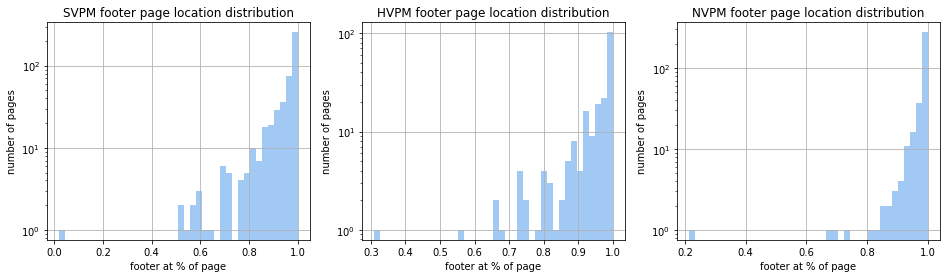

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

df.loc[df['cat'] == 'svpm', 'footer_percentage'].hist(bins=40, ax=ax[0], log=True)
ax[0].set_xlabel('footer at % of page')
ax[0].set_ylabel('number of pages')
ax[0].set_title('SVPM footer page location distribution')

df.loc[df['cat'] == 'hvpm', 'footer_percentage'].hist(bins=40, ax=ax[1], log=True)
ax[1].set_xlabel('footer at % of page')
ax[1].set_ylabel('number of pages')
ax[1].set_title('HVPM footer page location distribution')

df.loc[df['cat'] == 'nvpm', 'footer_percentage'].hist(bins=40, ax=ax[2], log=True)
ax[2].set_xlabel('footer at % of page')
ax[2].set_ylabel('number of pages')
ax[2].set_title('NVPM footer page location distribution')

plt.show()

We observe that there is the most variance as to where the footer starts in SVPM pages, and the least in NVPM pages.